# Background Analysis


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Show matplotlib plots in this notebook
%matplotlib inline
# Setting plot parameters
from pylab import rcParams
params = {
    'figure.figsize': (8, 8),
    'legend.fontsize': 15
}
rcParams.update(params)

In [2]:
df = pd.read_csv('../data/results.csv')

In [3]:
parents_edu_order = ['Did not complete high school', 'High school', 'Some postsecondary', 
                          'Postsecondary diploma (e.g. college)', 'Bachelor\'s', 
                          'Master\'s/Professional (MD, MBA, etc)', 'Doctorate']
family_income_order = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '>250k']
rounded_admission_avg_order = [i for i in range(70, 100)]

In [4]:
def bar_chart(col, order=None):
    if order:
        df.groupby(col).size().reindex(order).plot(kind='bar')
    else:
        df.groupby(col).size().sort_values(ascending=False).plot(kind='bar')
    plt.show()
    
def pie_chart(col):
    df.groupby(col).size().sort_values(ascending=False).plot(kind='pie', subplots=True)
    plt.show()
    
def bar_chart_vs_salary(col, order=None):
    if order:
        df[[col, 'coop_salary_avg']].groupby(col).mean().reindex(order).plot(kind='bar')
    else:
        df[[col, 'coop_salary_avg']].groupby(col).mean().sort_values('coop_salary_avg', ascending=False).plot(kind='bar')
    plt.show()

## Analysis

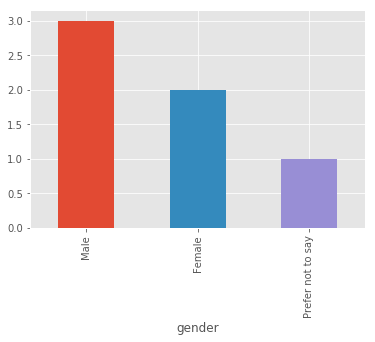

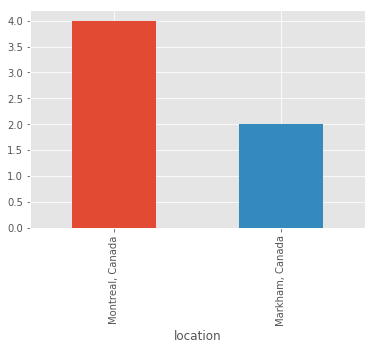

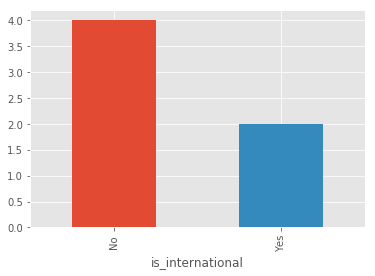

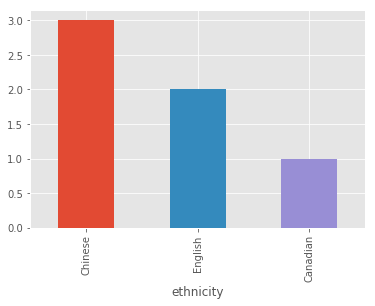

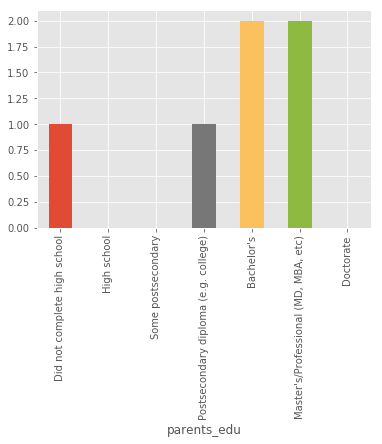

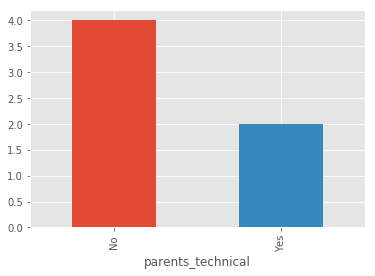

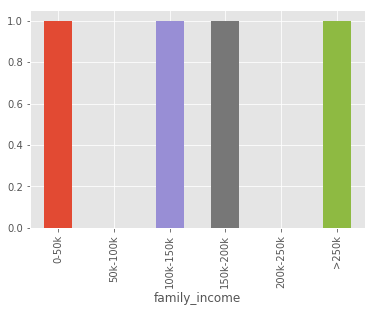

Number of people who weren't sure or prefered not to disclose family income: 2


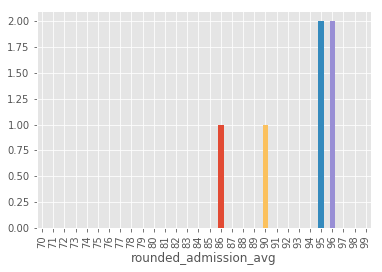

In [5]:
bar_chart('gender')
bar_chart('location')
bar_chart('is_international')
bar_chart('ethnicity')
bar_chart('parents_edu', parents_edu_order)
bar_chart('parents_technical')

bar_chart('family_income', family_income_order)
print 'Number of people who weren\'t sure or prefered not to disclose family income: ' + \
        str(df.loc[df['family_income'] == 'Not sure / prefer not to disclose'].shape[0])
    
bar_chart('rounded_admission_avg', rounded_admission_avg_order)

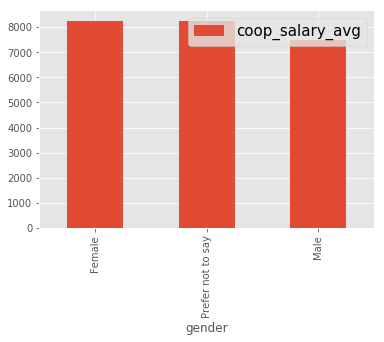

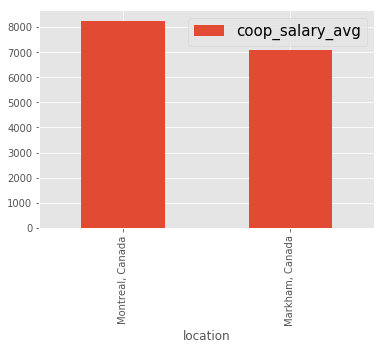

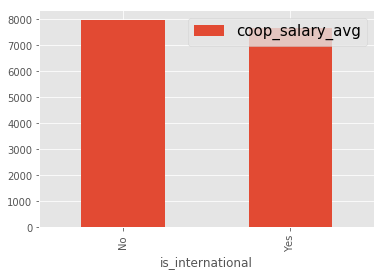

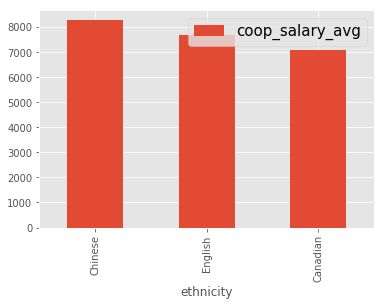

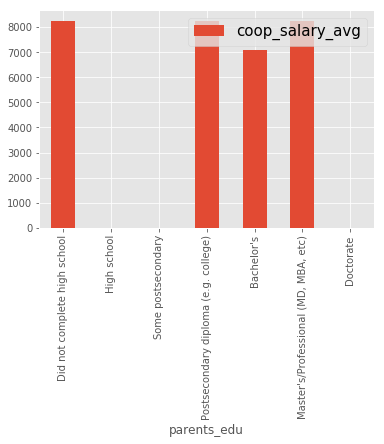

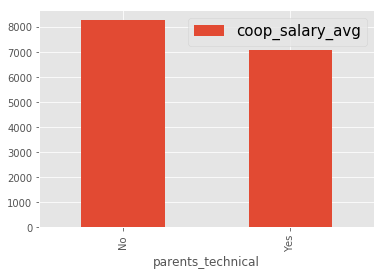

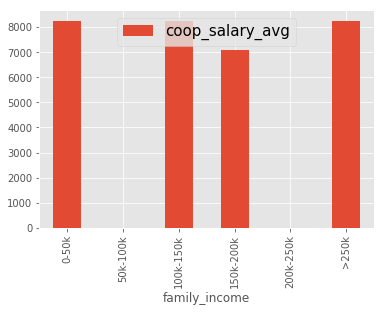

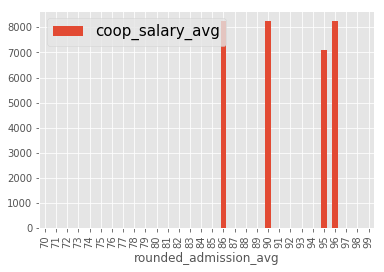

In [6]:
bar_chart_vs_salary('gender')
bar_chart_vs_salary('location')
bar_chart_vs_salary('is_international')
bar_chart_vs_salary('ethnicity')
bar_chart_vs_salary('parents_edu', parents_edu_order)
bar_chart_vs_salary('parents_technical')
bar_chart_vs_salary('family_income', family_income_order)
bar_chart_vs_salary('rounded_admission_avg', rounded_admission_avg_order)